# solve ODE using euler method

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

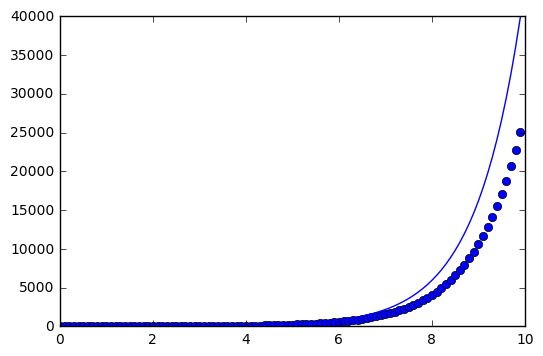

In [17]:
#euler method
x_init,y_init=0,1
x,y=x_init,y_init
f=lambda x,y:x+y
phi=lambda x,y:f(x,y)
h=0.1
maxiterator=100
xs=[]
ys=[]
for i in range(maxiterator):
    xs.append(x)
    ys.append(y)
    y+=h*phi(x,y)
    x+=h
fig,ax=plt.subplots()
ax.plot(xs,ys,'bo')
f_true=lambda x:-x-1+2*np.exp(x)
f_true=np.vectorize(f_true)
ys_true=f_true(xs)
ax.plot(xs,ys_true)

# solve ODE using heun method

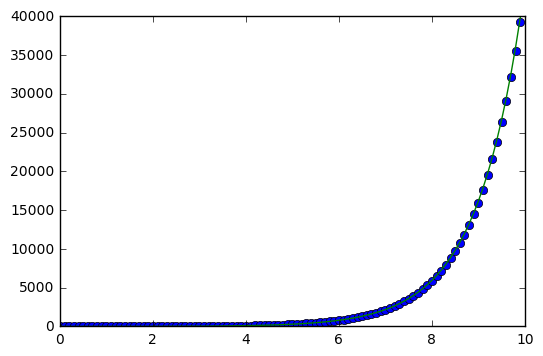

In [12]:
#heun method
x_init,y_init=0,1
x,y=x_init,y_init
f=lambda x,y:x+y
phi=lambda x,y:(f(x,y)+f(x+h,y+h*f(x,y)))/2
h=0.1
maxiterator=100
xs=[]
ys=[]
for i in range(maxiterator):
    xs.append(x)
    ys.append(y)
    y+=h*phi(x,y)
    x+=h
fig,ax=plt.subplots()
ax.plot(xs,ys,'bo')
xs=np.array(xs)
f_true=lambda x:-x-1+2*np.exp(x)
ys_true=f_true(xs)
ax.plot(xs,ys_true,'g-')

# modified euler method

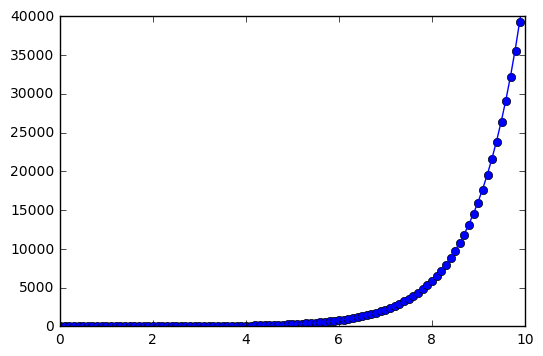

In [18]:
#euler method
x_init,y_init=0,1
x,y=x_init,y_init
f=lambda x,y:x+y
phi=lambda x,y:f(x+h/2.0,y+h*f(x,y)/2.0)
h=0.1
maxiterator=100
xs=[]
ys=[]
for i in range(maxiterator):
    xs.append(x)
    ys.append(y)
    y+=h*phi(x,y)
    x+=h
fig,ax=plt.subplots()
ax.plot(xs,ys,'bo')
f_true=lambda x:-x-1+2*np.exp(x)
f_true=np.vectorize(f_true)
ys_true=f_true(xs)
ax.plot(xs,ys_true)

# solve ODE using Runge-Kutta method

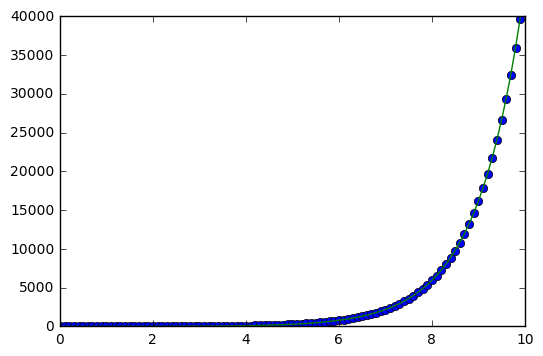

In [37]:
#heun method
x_init,y_init=0,1
x,y=x_init,y_init
f=lambda x,y:x+y
k_1=lambda x,y:f(x,y)
k_2=lambda x,y:f(x+h/2.0,y+h*k_1(x,y)/2.0)
k_3=lambda x,y:f(x+h/2.0,y+h*k_2(x,y)/2.0)
k_4=lambda x,y:f(x+h/2.0,y+h*k_3(x,y))
phi=lambda x,y:(k_1(x,y)+2*k_2(x,y)+2*k_3(x,y)+k_4(x,y))/6.0
h=0.1
maxiterator=100
xs=[]
ys=[]
for i in range(maxiterator):
    xs.append(x)
    ys.append(y)
    y+=h*phi(x,y)
    x+=h
fig,ax=plt.subplots()
ax.plot(xs,ys,'bo')
xs=np.array(xs)
f_true=lambda x:-x-1+2*np.exp(x)
ys_true=f_true(xs)
ax.plot(xs,ys_true,'g-')

# solve higher order ODE
$$y^{(n)}=f(x,y,y',\dots,y^{(n)}) \quad  y^{(k)}(x)\mid_{x=a}\;=y_k$$
$z_1(x) = y(x), z_2(x)=y'(x), \dots , z_k=y^{(k-1)}, \dots, z_n(x) = y^{(n-1)}(x)$ と置くと，
$z_1'(x)=z_2(x),\dots , z'_{n-1}(x)=z_n(x),z'_n(x)=f(x,z_1,z_2,\dots,z_n)$

solve higher order $y''=-y, y(0)=0, y'(0)=-1$

In [49]:
x_init=0.0
y0_init,y1_init=1.0,0.0
x=x_init
y=np.array([y0_init,y1_init])
f0=lambda x,y : y[1]
f1=lambda x,y : -y[0]
f=lambda x,y:np.array([f0(x,y),f1(x,y)])
phi=lambda x,y : (f(x,y)+ f(x+h,y+h*f(x,y)))/2.0
maxiterator=1000
h=0.1
xs=[]
ys=[]
for i in range(maxiterator):
    xs.append(x)
    ys.append(y.copy())
    x+=h
    y+=h*phi(x,y)

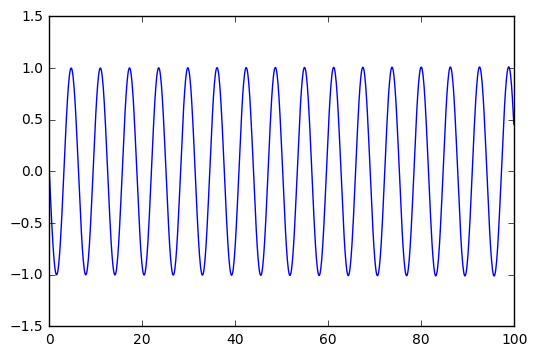

In [51]:
yplt=np.array(ys).transpose()[1]
plt.plot(xs,yplt)

solve ODE $y''=F(x,y,y')=-y \quad y(0)=0.0, y'(0)=-1.0$

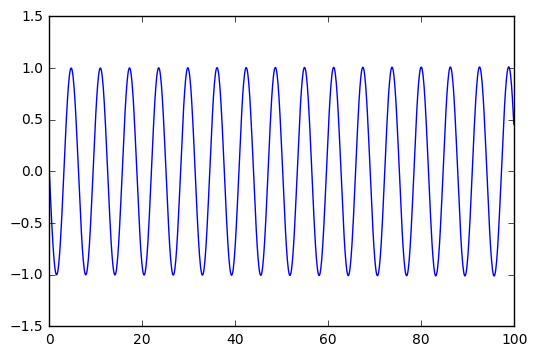

In [4]:
#solve ODE y^{(maxdeg)}=F(x,y',\dots,y^{(maxdeg-1)})
maxdeg=2

x_init=0.0
#y(0)=0,y'(0)=-1.0
y0_init,y1_init=0.0,-1.0
#F=-y
F  =lambda x,y : -y[0]
#set initial value
x=x_init
y=np.array([y0_init,y1_init])
#create tmp array to define fv
fs=[lambda x,y : y[k+1] for k in range(maxdeg-1)]
fs.append(lambda x,y : F(x,y))

fv=lambda x,y:np.array([fs[k](x,y) for k in range(len(fs))])
#apply Heun method
phi=lambda x,y : (fv(x,y)+ fv(x+h,y+h*fv(x,y)))/2.0

maxiterator=1000
h=0.1
xplt,ys=[],[]
for i in range(maxiterator):
    xplt.append(x)
    ys.append(y.copy())
    x+=h
    y+=h*phi(x,y)
    

yplt=np.array(ys).transpose()[0]
plt.plot(xplt,yplt)